# Overland Flow using Landlab

In [4]:
from __future__ import print_function
from landlab.components.overland_flow import OverlandFlow
from landlab.plot.imshow import imshow_grid
from landlab.plot.colors import water_colormap
from landlab import RasterModelGrid
from landlab.io.esri_ascii import read_esri_ascii
import numpy as np
from time import time
from matplotlib import pyplot as plt
%matplotlib inline

Initial conditions

In [5]:
run_time = 1000           # sec
h_init = 0.1            # initial thin water depth (m)
n = 0.01                  # mannings roughness coefficient, (s/m^(1/3))
g = 9.8                   # gravity (m/s^2)
alpha = 0.7               # time-step factor (nondimensional; from Bates et al., 2010)
u = 100 #0.4                   # constant velocity (m/s)
elapsed_time = 1.0 # starts at time 1 to prevent errors

Load in the DEM and set some boundary conditions

In [6]:
rmg, z = read_esri_ascii('Square_TestBasin.asc')
rmg.add_field('node', 'topographic__elevation', z)
rmg.set_closed_boundaries_at_grid_edges(True, True, True, True)
np.all(rmg.at_node['topographic__elevation'] == z)

True

Open the outlet to let the water out

In [7]:
my_outlet_node = 100 # For the squarebasin DEM, the outlet location was known
rmg.status_at_node[my_outlet_node] = 1  # 1 means fixed value

Initialize a grid for the water depth data

In [8]:
rmg.add_zeros('node', 'surface_water__depth')                   # water depth (m)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

Now add starting water depth

In [9]:
rmg.at_node['surface_water__depth'] += h_init
of = OverlandFlow(rmg, steep_slopes = True) #for stability in steeper environments

Look at the watershed topography

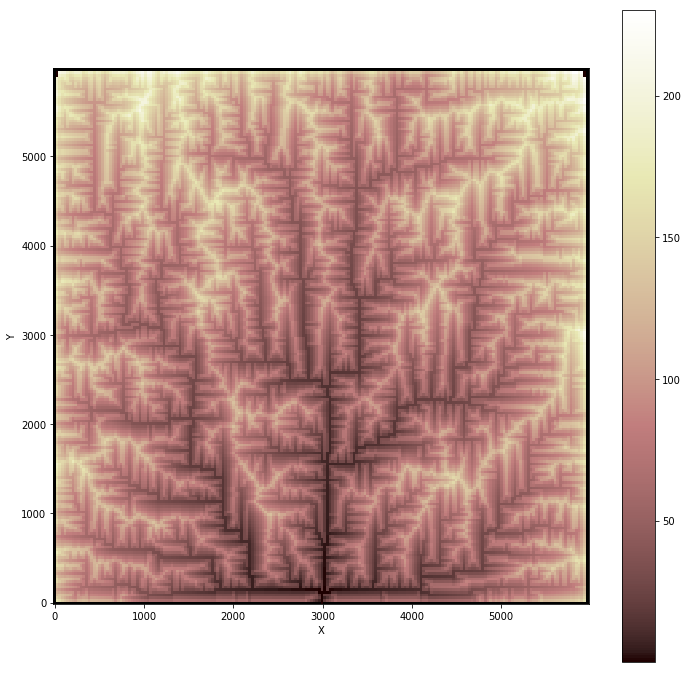

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
imshow_grid(rmg, 'topographic__elevation')
#plt.savefig("ArtificialBasin_topgraphy.png") #name it elasped time

Now run the model

In [ ]:
#png atte

#run_time = 0 #3600*3 sec = 3 hours
for n in range (0,55):
    #  calculate  time step.
    dt = of.calc_time_step()
    #  generate overland flow.
    of.overland_flow()
    # Increased elapsed time
    #print('Elapsed time: ', elapsed_time)
    elapsed_time += dt
    
    
  
    
    #plt.clf() 
    #fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    #imshow_grid(rmg, 'surface_water__depth', cmap='Blues',plot_name='Artificial Basin',var_units='Water Depth In Meters', grid_units='mm')#,limits=(0, 5)) #add in limits to set scal bar
    
    #filename = 'ArtificialBasinstreams'+ elapsed_time + '.png'
    #plt.savefig("ArtificialBasinstreams_2hrs_fixed_"+str(n)+".png") #name it elasped time
imshow_grid(rmg, 'surface_water__depth', cmap='Blues',plot_name='Artificial Basin',var_units='Water Depth In Meters', grid_units='mm')#,limits=(0, 5)) #add in limits to set scal bar
    

# Now Gully

In [2]:
run_time = 1000           # duration of run, (s)
h_init = 0.1            # initial thin layer of water (m)
n = 0.01                  # roughness coefficient, (s/m^(1/3))
g = 9.8                   # gravity (m/s^2)
alpha = 0.7               # time-step factor (nondimensional; from Bates et al., 2010)
u = 100 #0.4                   # constant velocity (m/s, de Almeida et al., 2012)

elapsed_time = 1.0 # starts at time 1 to prevent errors

In [3]:
rmg, z = read_esri_ascii('west_bijou_gully.asc')
rmg.add_field('node', 'topographic__elevation', z)
rmg.set_closed_boundaries_at_grid_edges(True, True, True, True)
np.all(rmg.at_node['topographic__elevation'] == z)
rmg.add_zeros('node', 'surface_water__depth')                   # water depth (m)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [4]:
rmg.at_node['surface_water__depth'] += h_init
of = OverlandFlow(rmg, steep_slopes = True) #for stability in steeper environments set to true

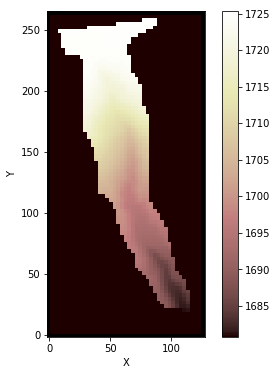

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

min_z = np.min(z[np.where(z>0)]) 
max_z = np.max(z[np.where(z>0)])
#help(imshow_grid)
imshow_grid(rmg, 'topographic__elevation', limits=(min_z,max_z))

plt.savefig("Gully_topgraphy.png")

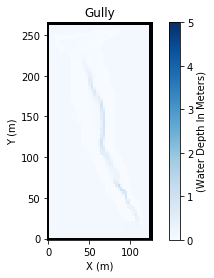

In [6]:

for n in range (0,45):
    # First,  calculate the time step.
    dt = of.calc_time_step()
    #  generate overland flow.
    of.overland_flow()
    # increased elapsed time
    elapsed_time += dt
    
    
  
    
    plt.clf() 
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    imshow_grid(rmg, 'surface_water__depth', cmap='Blues',plot_name='Gully',var_units='Water Depth In Meters', grid_units='mm')#,limits=(0, 5)) #add in limits to set scal bar
    
    filename = 'ArtificialBasinstreams'+ elapsed_time + '.png'
    plt.savefig("Gullystreams_variablescale"+str(n)+".png") #name it elasped time
imshow_grid(rmg, 'surface_water__depth', cmap='Blues',plot_name='Gully',var_units='Water Depth In Meters', grid_units='mm',limits=(0, 5)) #add in limits to set scal bar
    